In [2]:
import lalsimulation as LS
import numpy as np
import matplotlib.pyplot as plt

-0.624588422 0.000244140625
-0.625905493 0.000244140625


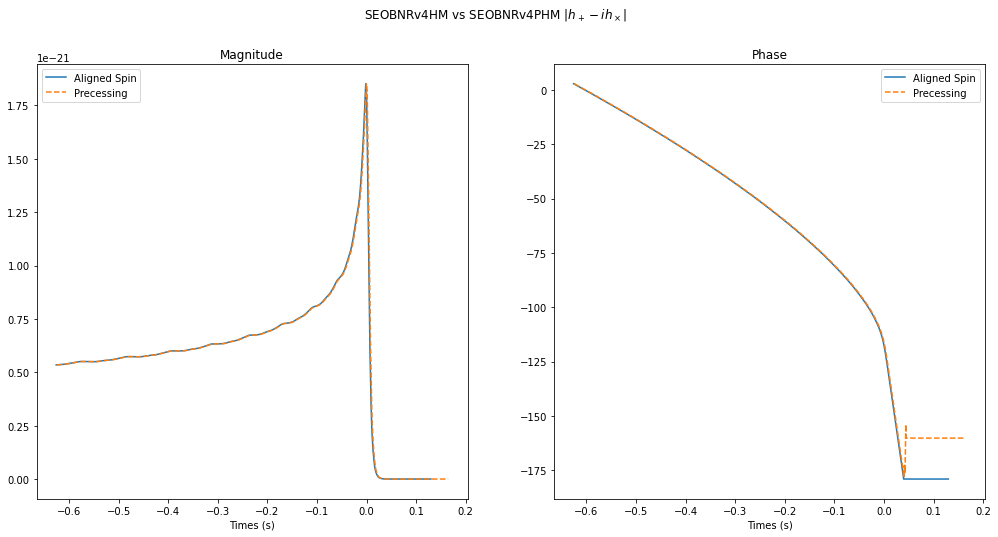

In [8]:
# Set of parameters to be passed to siminspiralTD
# They are labelled as 
#   m1, m2, S1x, S1y, S1z, S2x, S2y, S2z,
#   distance, inclination, phiRef,
#   longAscNodes, eccentricity, meanPerAno,
#   delta_t, f_min, f_ref
#   lal_params, approximant
# GW150914-like masses
p = [7.734914519351992e+31, 6.3430275878490625e+31, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3576981358562016e+25, 0.3, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 20.0, 20.0, None, 52]

phm_hp, phm_hc = LS.SimInspiralChooseTDWaveform(*p)
times_phm = np.arange(0, phm_hp.data.length*phm_hp.deltaT, phm_hp.deltaT) + phm_hp.epoch
print(phm_hp.epoch, phm_hp.deltaT)
phm_hp = phm_hp.data.data
phm_hc = phm_hc.data.data
phm_strain = phm_hp - 1j*phm_hc

p[-1] = LS.SEOBNRv4HM
hm_hp, hm_hc = LS.SimInspiralChooseTDWaveform(*p)
times_hm = np.arange(0, hm_hp.data.length*hm_hp.deltaT, hm_hp.deltaT) + hm_hp.epoch
print(hm_hp.epoch, hm_hp.deltaT)
hm_hp = hm_hp.data.data
hm_hc = hm_hc.data.data
hm_strain = hm_hp - 1j*hm_hc

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
fig.suptitle(r"SEOBNRv4HM vs SEOBNRv4PHM $|h_+ - i h_\times|$")

axes[0].set_title("Magnitude")
axes[0].set_xlabel("Times (s)")
axes[0].plot(times_hm, np.abs(hm_strain), label="Aligned Spin")
axes[0].plot(times_phm, np.abs(phm_strain), linestyle='--', label="Precessing")
axes[0].legend()

# Plotting phase
axes[1].set_title("Phase")
axes[1].set_xlabel("Times (s)")
axes[1].plot(times_hm, np.unwrap(np.angle(hm_strain)), label="Aligned Spin")
axes[1].plot(times_phm, np.unwrap(np.angle(phm_strain)), linestyle='--', label="Precessing")
axes[1].legend(loc='upper right')


0.0 2048.0


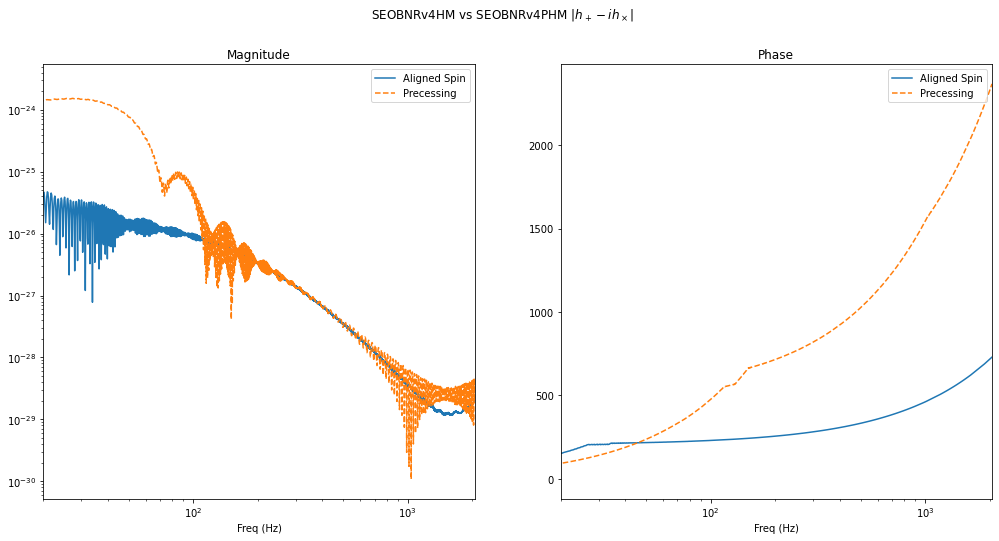

In [4]:
# Set of parameters to be passed to siminspiralFD
# They are labelled as 
#   m1, m2, S1x, S1y, S1z, S2x, S2y, S2z,
#   distance, inclination, phiRef,
#   longAscNodes, eccentricity, meanPerAno,
#   deltaF, f_min, f_max, f_ref,
#   lal_params, approximant
# GW150914-like masses
p = [7.734914519351992e+31, 6.3430275878490625e+31, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3576981358562016e+25, 0, 0.0, 0.0, 0.0, 0.0, 0.125, 20.0, 2048.0, 20.0, None, LS.SEOBNRv4PHM]

phm_hp, phm_hc = LS.SimInspiralFD(*p)
freqs = np.arange(0, phm_hp.data.length*phm_hp.deltaF, phm_hp.deltaF)
print(freqs[0], freqs[-1])
phm_hp = phm_hp.data.data
phm_hc = phm_hc.data.data
phm_strain = phm_hp - 1j*phm_hc

p[-1] = LS.SEOBNRv4HM
hm_hp, hm_hc = LS.SimInspiralFD(*p)
hm_hp = hm_hp.data.data
hm_hc = hm_hc.data.data
hm_strain = hm_hp - 1j*hm_hc

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
fig.suptitle(r"SEOBNRv4HM vs SEOBNRv4PHM $|h_+ - i h_\times|$")

axes[0].set_xscale('log')
axes[0].set_xlim([20, 2048])
axes[0].set_yscale('log')
axes[0].set_title("Magnitude")
axes[0].set_xlabel("Freq (Hz)")
axes[0].plot(freqs, np.abs(hm_strain), label="Aligned Spin")
axes[0].plot(freqs, np.abs(phm_strain), linestyle='--', label="Precessing")
axes[0].legend()

# Plotting phase
axes[1].set_xscale('log')
axes[1].set_xlim([20, 2048])
axes[1].set_title("Phase")
axes[1].set_xlabel("Freq (Hz)")
axes[1].plot(freqs, np.unwrap(np.angle(hm_strain)), label="Aligned Spin")
axes[1].plot(freqs, np.unwrap(np.angle(phm_strain)), linestyle='--', label="Precessing")
axes[1].legend(loc='upper right')

In [10]:
# Differences
print(LS.SimInspiralGetSpinFreqFromApproximant(LS.SEOBNRv4HM), LS.SimInspiralGetSpinFreqFromApproximant(LS.SEOBNRv4PHM))

# So PHM goes through ChooseTDWaveform -> Taper h_plus and h_cross
# While HM just gets SimInspiralTDFromTD

# If HM is wrong then somehow this SimInspiralTDFromTD isn't giving the correct result


# Could just use PHM to validate the result, but that would be a bit hacky

(2, 1)